<center>

# BCRP | 2026 Curso de Extensión de Economía Avanzada
## "High-Dimensional Econometrics"
### Exámen Práctico

</center>

**Code:** Student's numerical code

**<ins>Instructions</ins>**: Please answer _all_ questions in the space provided below each cell either in English or Español. Full marks are not only given for correct answers but for elegance, preciseness, and presentation. Please make sure your notebook runs without an error.

**<ins>Note 1</ins>**: Your notebook should be fully executed (and without error) before submission. Failure to do so, will mean a that all earned points will be multiplied by 0.45, i.e., a 10\% penalty.

**<ins>Note 2</ins>**: There will be a 10% penalty for each minute pass the deadline of 11:59 pm on January 11th, 2026.

In [222]:
%%capture
import stata_setup, os
if os.name == 'nt':
    stata_setup.config('C:/Program Files/Stata17/','mp')
else:
    stata_setup.config('/usr/local/stata17','mp')

In [223]:
from sfi import Data
from pystata import stata
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


#### Question 1

In lectures, we look at the _linear_ relationship between the natural logarithm of the [Flesch–Kincaid grade level](https://en.wikipedia.org/wiki/Flesch-Kincaid_readability_tests) (`log_flesch_kincaid_grade_level`) and the proportion of women among the authors (`prop_women`) as described in the [variable description](https://github.com/lfsanche/econ_letters/blob/main/data/vars_description.md) of the data set in [Rodriguez, et. al. (2024, _Economics Letters_)](https://doi.org/10.1016/j.econlet.2024.111541) controlling for other variables. In this question, we are going to look at the _linear_ relationship between the natural logarithm of the [Automated Readability Index](https://en.wikipedia.org/wiki/Automated_readability_index) (`log_automated_readability_index`) and the indicator variable that there are only men among authors (`only_males`), i.e., a **dummy variable**. _All_ your analysis should cluster standard errors at the `cluster` variable level as we did in the lectures. Similarly, the base category remains articles published in the AER, in the field of 'Microeconomics', in 2000, that belongs to the first cluster unless stated otherwise.

(a) [2%] Using either Python or Stata, create a [scatter plot](https://en.wikipedia.org/wiki/Scatter_plot) of `log_automated_readability_index` against `log_flesch_kincaid_grade_level` where both axis range from 1.5 to 4.5. Please add a 90\% degree line to your graph. If you were to repeat the analysis in the lecture notes but using `log_automated_readability_index` instead of the `log_flesch_kincaid_grade_level`, do you expect the results to change? **Note**: Your graph should contain a title, and appropriate axis _labels_.

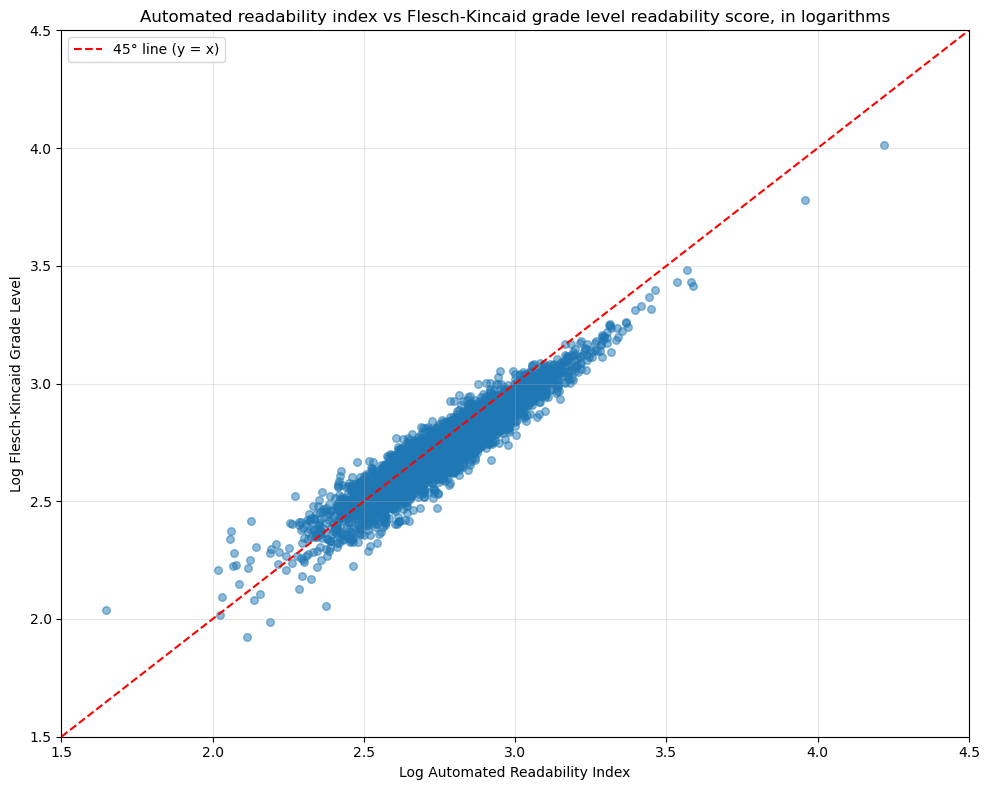

In [7]:
#retrieve variables from stata
data = pd.read_stata("../data/data.dta")

#scatter
fig, ax = plt.subplots(figsize=(10, 8))

# Scatter
ax.scatter(data['log_automated_readability_index'], 
           data['log_flesch_kincaid_grade_level'],
           alpha=0.5, s=30)

# Axis limits
ax.set_xlim(1.5, 4.5)
ax.set_ylim(1.5, 4.5)

# 45-degree line
x_range = np.array([1.5, 4.5])
ax.plot(x_range, x_range, 'r--', label='45° line (y = x)')

# Labels
ax.set_xlabel('Log Automated Readability Index', fontsize=10)
ax.set_ylabel('Log Flesch-Kincaid Grade Level', fontsize=10)
ax.set_title('Automated readability index vs Flesch-Kincaid grade level readability score, in logarithms', fontsize=12)

ax.grid(True, alpha=0.3)
ax.legend()

plt.tight_layout()
plt.show()

Answer: The scatter plot shows a strong positive relationship between log Automated Readability Index and log Flesch–Kincaid Grade Level. Most points lie close to the 45-degree line, indicating an almost one-to-one correspondence between both measures. This suggests that using either readability index would lead to very similar empirical results.

(b) [2%] Modifying correctly the set code block that uses the [`vl`](https://www.stata.com/manuals/dvl.pdf) Stata commands discussed in lectures, please re-create the `baseline` and `mfe` variable lists taking into account that `only_males` is now replacing `prop_women` and it is a **dummy variable**. Your code should print both variable lists. **Note**: `prop_women` is not longer part of this analysis, and `baseline` should not include the `only_males` variable.

In [215]:
%%stata -qui
use "../data/data", clear
egen journal1 = group(journal)
quietly tabulate year, generate(y_)
quietly tabulate cluster, generate(c_)

local journals  ecm jpe qje res  //AER based category

local jel_imp a_imp b_imp c_imp  e_imp f_imp g_imp h_imp i_imp j_imp k_imp /// 
		l_imp m_imp n_imp o_imp p_imp q_imp r_imp y_imp z_imp // D JEL based case
#delimit ;
vl set log_num_authors log_num_pages both_genders only_males
       `journals' `jel_imp' y_2-y_20  c_2-c_215 jel_flag
       , dummy clear nonotes;

vl create fe = vldummy - (both_genders jel_flag only_males);
vl substitute mfe = i.fe;
vl create controls = vlcontinuous;
vl create controls_dummy = (both_genders jel_flag);
vl substitute baseline = i.controls_dummy controls;
vl rebuild;
#delimit cr

In [150]:
%%stata
display "$baseline"
display "$mfe"


. display "$baseline"
i.both_genders i.jel_flag log_num_pages log_num_authors

. display "$mfe"
i.ecm i.jpe i.qje i.res i.a_imp i.b_imp i.c_imp i.e_imp i.f_imp i.g_imp i.h_imp
>  i.i_imp i.j_imp i.k_imp i.l_imp i.m_imp i.n_imp i.o_imp i.p_imp i.q_imp i.r_
> imp i.y_imp i.z_imp i.y_2 i.y_3 i.y_4 i.y_5 i.y_6 i.y_7 i.y_8 i.y_9 i.y_10 i.
> y_11 i.y_12 i.y_13 i.y_14 i.y_15 i.y_16 i.y_17 i.y_18 i.y_19 i.y_20 i.c_2 i.c
> _3 i.c_4 i.c_5 i.c_6 i.c_7 i.c_8 i.c_9 i.c_10 i.c_11 i.c_12 i.c_13 i.c_14 i.c
> _15 i.c_16 i.c_17 i.c_18 i.c_19 i.c_20 i.c_21 i.c_22 i.c_23 i.c_24 i.c_25 i.c
> _26 i.c_27 i.c_28 i.c_29 i.c_30 i.c_31 i.c_32 i.c_33 i.c_34 i.c_35 i.c_36 i.c
> _37 i.c_38 i.c_39 i.c_40 i.c_41 i.c_42 i.c_43 i.c_44 i.c_45 i.c_46 i.c_47 i.c
> _48 i.c_49 i.c_50 i.c_51 i.c_52 i.c_53 i.c_54 i.c_55 i.c_56 i.c_57 i.c_58 i.c
> _59 i.c_60 i.c_61 i.c_62 i.c_63 i.c_64 i.c_65 i.c_66 i.c_67 i.c_68 i.c_69 i.c
> _70 i.c_71 i.c_72 i.c_73 i.c_74 i.c_75 i.c_76 i.c_77 i.c_78 i.c_79 i.c_80 i.c
> _81 i.c_82 i.c_83 i.c

(c) [2%] Rename `log_automated_readability_index` as `ARI` and using Stata perform an Ordinary Least Squares regression of `ARI` on `only_males` and variable lists `baseline` and `mfe` making sure that Stata understands that `only_males` is a dummy variable and that standard errors are clustered at the `cluster` level as discussed in the lectures. Do this quietly but save the results in an object called `m0`. After reading this post about the [`etable`](https://www.stata.com/stata17/tables-of-estimation-results/) Stata command as well as Jupyter's capabilities to display different [files and format outputs](https://jupyterlab.readthedocs.io/en/latest/user/file_formats.html), proceed to print _inline_ a `html` table of the estimated coefficient (with 3 decimals) as well as the _p_-value (with 4 decimals) for the regressors `log_num_authors`, `log_num_pages`, `both_genders` and `only_males`. Provide a interpretation of the estimated coefficient for `only_males`. Is it significant? if yes, a what level? **Note**: No points will be awarded if you simply use the [`estimates table`](https://www.stata.com/manuals/restimatestable.pdf) Stata command discussed in the lectures.

In [151]:
%%stata -qui

* Rename the variable
rename log_automated_readability_index ARI

* Run the OLS regression with clustered standard errors
regress ARI i.only_males $baseline $mfe, vce(cluster cluster)
estimates store m0

* print etable
etable, keep(1.only_males log_num_authors log_num_pages 1.both_genders) cstat(_r_b) cstat(_r_p, nformat(%6.4g)) export(table_f.html, replace)

In [244]:
# =========================
# 1) Stata: tu estimación + export
# =========================
stata.run('''rename log_automated_readability_index ARI
            regress ARI i.only_males $baseline $mfe, vce(cluster cluster)
            estimates store m0
            etable, keep(1.only_males log_num_authors log_num_pages 1.both_genders) ///
            cstat(_r_b, nformat(%9.4f)) ///
            cstat(_r_p, nformat(%6.4g sformat("(%s)")) ///
            export(table_f.html, replace)''', quietly=True)

# =========================
# 2) Python: estandarizar formato HTML (coef + p-value en filas separadas)
# =========================
from IPython.display import HTML, display
import re

html_path = "table_f.html"
with open(html_path, "r", encoding="utf-8") as f:
    raw_html = f.read()

css = """
<style>
  :root{
    --text:#111827; --muted:#6b7280; --line:#e5e7eb; --head:#f3f4f6;
    --zebra:#fafafa; --hover:#f8fafc; --card:#ffffff; --shadow:0 8px 20px rgba(0,0,0,.06);
    --pval:#6b7280;
  }
  @media (prefers-color-scheme: dark){
    :root{
      --text:#e5e7eb; --muted:#9ca3af; --line:#2d3748; --head:#111827;
      --zebra:#0b1220; --hover:#0f172a; --card:#0b1020; --shadow:0 12px 28px rgba(0,0,0,.35);
      --pval:#a1a1aa;
    }
  }

  .stata-table-wrap{
    font-family: ui-sans-serif, system-ui, -apple-system, Segoe UI, Roboto, Helvetica, Arial;
    color: var(--text);
    max-width: 950px;
    margin: 18px auto;
  }
  .stata-table-card{
    background: var(--card);
    border: 1px solid var(--line);
    border-radius: 14px;
    box-shadow: var(--shadow);
    padding: 14px 14px 10px 14px;
  }
  .stata-table-caption{
    font-weight: 700;
    font-size: 15px;
    line-height: 1.35;
    margin: 4px 4px 12px 4px;
  }
  .stata-table-scroll{ overflow-x:auto; border-radius: 10px; }

  .stata-table-card table{ width:100%; border-collapse: separate; border-spacing:0; font-size:13px; }
  .stata-table-card th, .stata-table-card td{
    padding: 9px 10px;
    border-bottom: 1px solid var(--line);
    vertical-align: middle;
    white-space: nowrap;
    font-variant-numeric: tabular-nums;
  }
  .stata-table-card thead th{
    background: var(--head);
    font-weight: 700;
    text-align: center;
    border-top: 1px solid var(--line);
  }
  .stata-table-card thead tr:first-child th:first-child{ border-top-left-radius: 10px; }
  .stata-table-card thead tr:first-child th:last-child{ border-top-right-radius: 10px; }

  /* Zebra solo para filas normales */
  .stata-table-card tbody tr:not(.pval-row):nth-child(even) td{ background: var(--zebra); }
  .stata-table-card tbody tr:hover td{ background: var(--hover); }

  /* Alineación */
  .stata-table-card tbody td:first-child,
  .stata-table-card thead th:first-child{ text-align:left; }
  .stata-table-card tbody td:not(:first-child){ text-align:right; }

  /* Coef row */
  .coef-row td:not(:first-child){ font-weight: 650; }

  /* P-value row */
  .pval-row td{
    color: var(--pval);
    font-size: 12px;
    padding-top: 2px;
    padding-bottom: 8px;
  }
  .pval-row td:first-child{ color: transparent; }
  .pval-row td:not(:first-child){ font-style: italic; }

  /* Secciones */
  .section-row td{
    font-weight: 700;
    text-align: left !important;
    background: var(--head) !important;
    border-top: 1px solid var(--line);
  }

  .stata-table-note{
    font-size: 12px;
    color: var(--muted);
    margin: 10px 4px 0 4px;
    line-height: 1.35;
  }
</style>
"""

processed_html = raw_html

try:
    from bs4 import BeautifulSoup
    soup = BeautifulSoup(raw_html, "html.parser")

    table = soup.find("table")

    def looks_like_pvalue_token(s: str) -> bool:
        s = s.strip()
        if not s:
            return False
        # (0.1234) o (1.1e-04)
        if re.fullmatch(r"\(\s*[\d\.Ee\-\+]+\s*\)", s):
            return True
        # 0.0682 o 0.0000
        if re.fullmatch(r"[\d]*\.?[\d]+", s):
            return True
        # 1.1e-04 / 3.9E-06
        if re.fullmatch(r"[\d]*\.?[\d]+[eE][\-\+]\d+", s):
            return True
        return False

    if table:
        tbody = table.find("tbody")
        if tbody:
            rows = tbody.find_all("tr", recursive=False)

            for i, tr in enumerate(rows):
                tds = tr.find_all(["td","th"], recursive=False)
                if not tds:
                    continue

                texts = [td.get_text(strip=True) for td in tds]
                nonempty = [t for t in texts if t != ""]

                # sección: solo un texto en primera columna
                looks_like_section = (len(nonempty) == 1 and texts[0] != "")

                first = texts[0]
                rest = texts[1:]
                rest_nonempty = [x for x in rest if x != ""]

                # p-value row: primera celda vacía y resto son tokens pvalue-like
                looks_like_pval = (
                    (first == "" or first.isspace()) and
                    len(rest_nonempty) > 0 and
                    all(looks_like_pvalue_token(x) for x in rest_nonempty)
                )

                if looks_like_section:
                    tr["class"] = (tr.get("class", []) + ["section-row"])
                elif looks_like_pval:
                    # Opcional: forzar paréntesis si vienen “pelados”
                    for j, td in enumerate(tds[1:], start=1):
                        txt = td.get_text(strip=True)
                        if txt and not txt.startswith("(") and looks_like_pvalue_token(txt):
                            td.string = f"({txt})"

                    tr["class"] = (tr.get("class", []) + ["pval-row"])
                    if i > 0:
                        prev = rows[i-1]
                        prev["class"] = (prev.get("class", []) + ["coef-row"])

    processed_html = str(soup)

except Exception:
    processed_html = raw_html

caption = "Regression results for ARI (p-values shown below coefficients)"

pretty_html = f"""
{css}
<div class="stata-table-wrap">
  <div class="stata-table-card">
    <div class="stata-table-caption">{caption}</div>
    <div class="stata-table-scroll">
      {processed_html}
    </div>
    <div class="stata-table-note">
      Notes: Coefficients are reported on the first row; p-values are reported below in parentheses.
    </div>
  </div>
</div>
"""

display(HTML(pretty_html))


SystemError: variable log_automated_readability_index not found
r(111);


_Answer_: The coefficient on only_males is 0.019, indicating that abstracts written by all-male author teams have, on average, a 1.9% higher ARI than the reference group, holding other factors constant. Since a higher ARI implies lower readability, this suggests that all-male teams produce less readable abstracts. The effect is statistically significant at the 1% level (p = 0.0001).

(d) [2%] Using the _Specification Curve Analisys_ discussed in the lecture, is your answer to the part (c) above _robust_ to different model specifications? **Note**: This question requires you to alter the `readability_graph_spectuve.yml` file used in the lectures.

In [81]:
# File name (same as instructor's)
file_path = "../code/readability_graph_specurve.yml"

with open(file_path, "r", encoding="utf-8") as file:
    lines = file.readlines()

modified_lines = []

for line in lines:
    stripped_line = line.strip()

    # --- DEPENDENT VARIABLE: enable ARI, disable FKG ---

    # Un-comment ARI (if commented)
    if stripped_line.startswith("#     - ln(Automated readability index): log_automated_readability_index"):
        modified_lines.append(line.replace("#     - ln(Automated readability index): log_automated_readability_index", "- ln(Automated readability index): ARI", 1))
        continue

    # Comment FKG (if active)
    if stripped_line.startswith("- log(F-K grade): log_flesch_kincaid_grade_level"):
        modified_lines.append(line.replace("- log(F-K grade):", "# - log(F-K grade):", 1))
        continue

    # --- FOCAL VARIABLE: enable only_males, disable prop_women ---

    # Un-comment only_males (if commented)
    if stripped_line.startswith("#     - Only male: only_male"):
        modified_lines.append(line.replace("#     - Only male: only_male", "- Only male: only_males", 1))
        continue

    # Comment prop_women (if active)
    if stripped_line.startswith("- Proportion of women: prop_women"):
        modified_lines.append(line.replace("- Proportion of women:", "# - Proportion of women:", 1))
        continue

    modified_lines.append(line)

with open(file_path, "w", encoding="utf-8") as file:
    file.writelines(modified_lines)

print("YML ready: DV = log_automated_readability_index (ON) and focal = only_males (ON).")


YML ready: DV = log_automated_readability_index (ON) and focal = only_males (ON).



. #delimit ;
delimiter now ;
. quietly specurve using "readability_graph_specurve.yml",
>         desc noci99 width(8) height(10) relativesize(0.4)
>         scale(0.7) title("Specification Curve Analsyis of Only of men");

. #delimit crs
delimiter now ;
. 


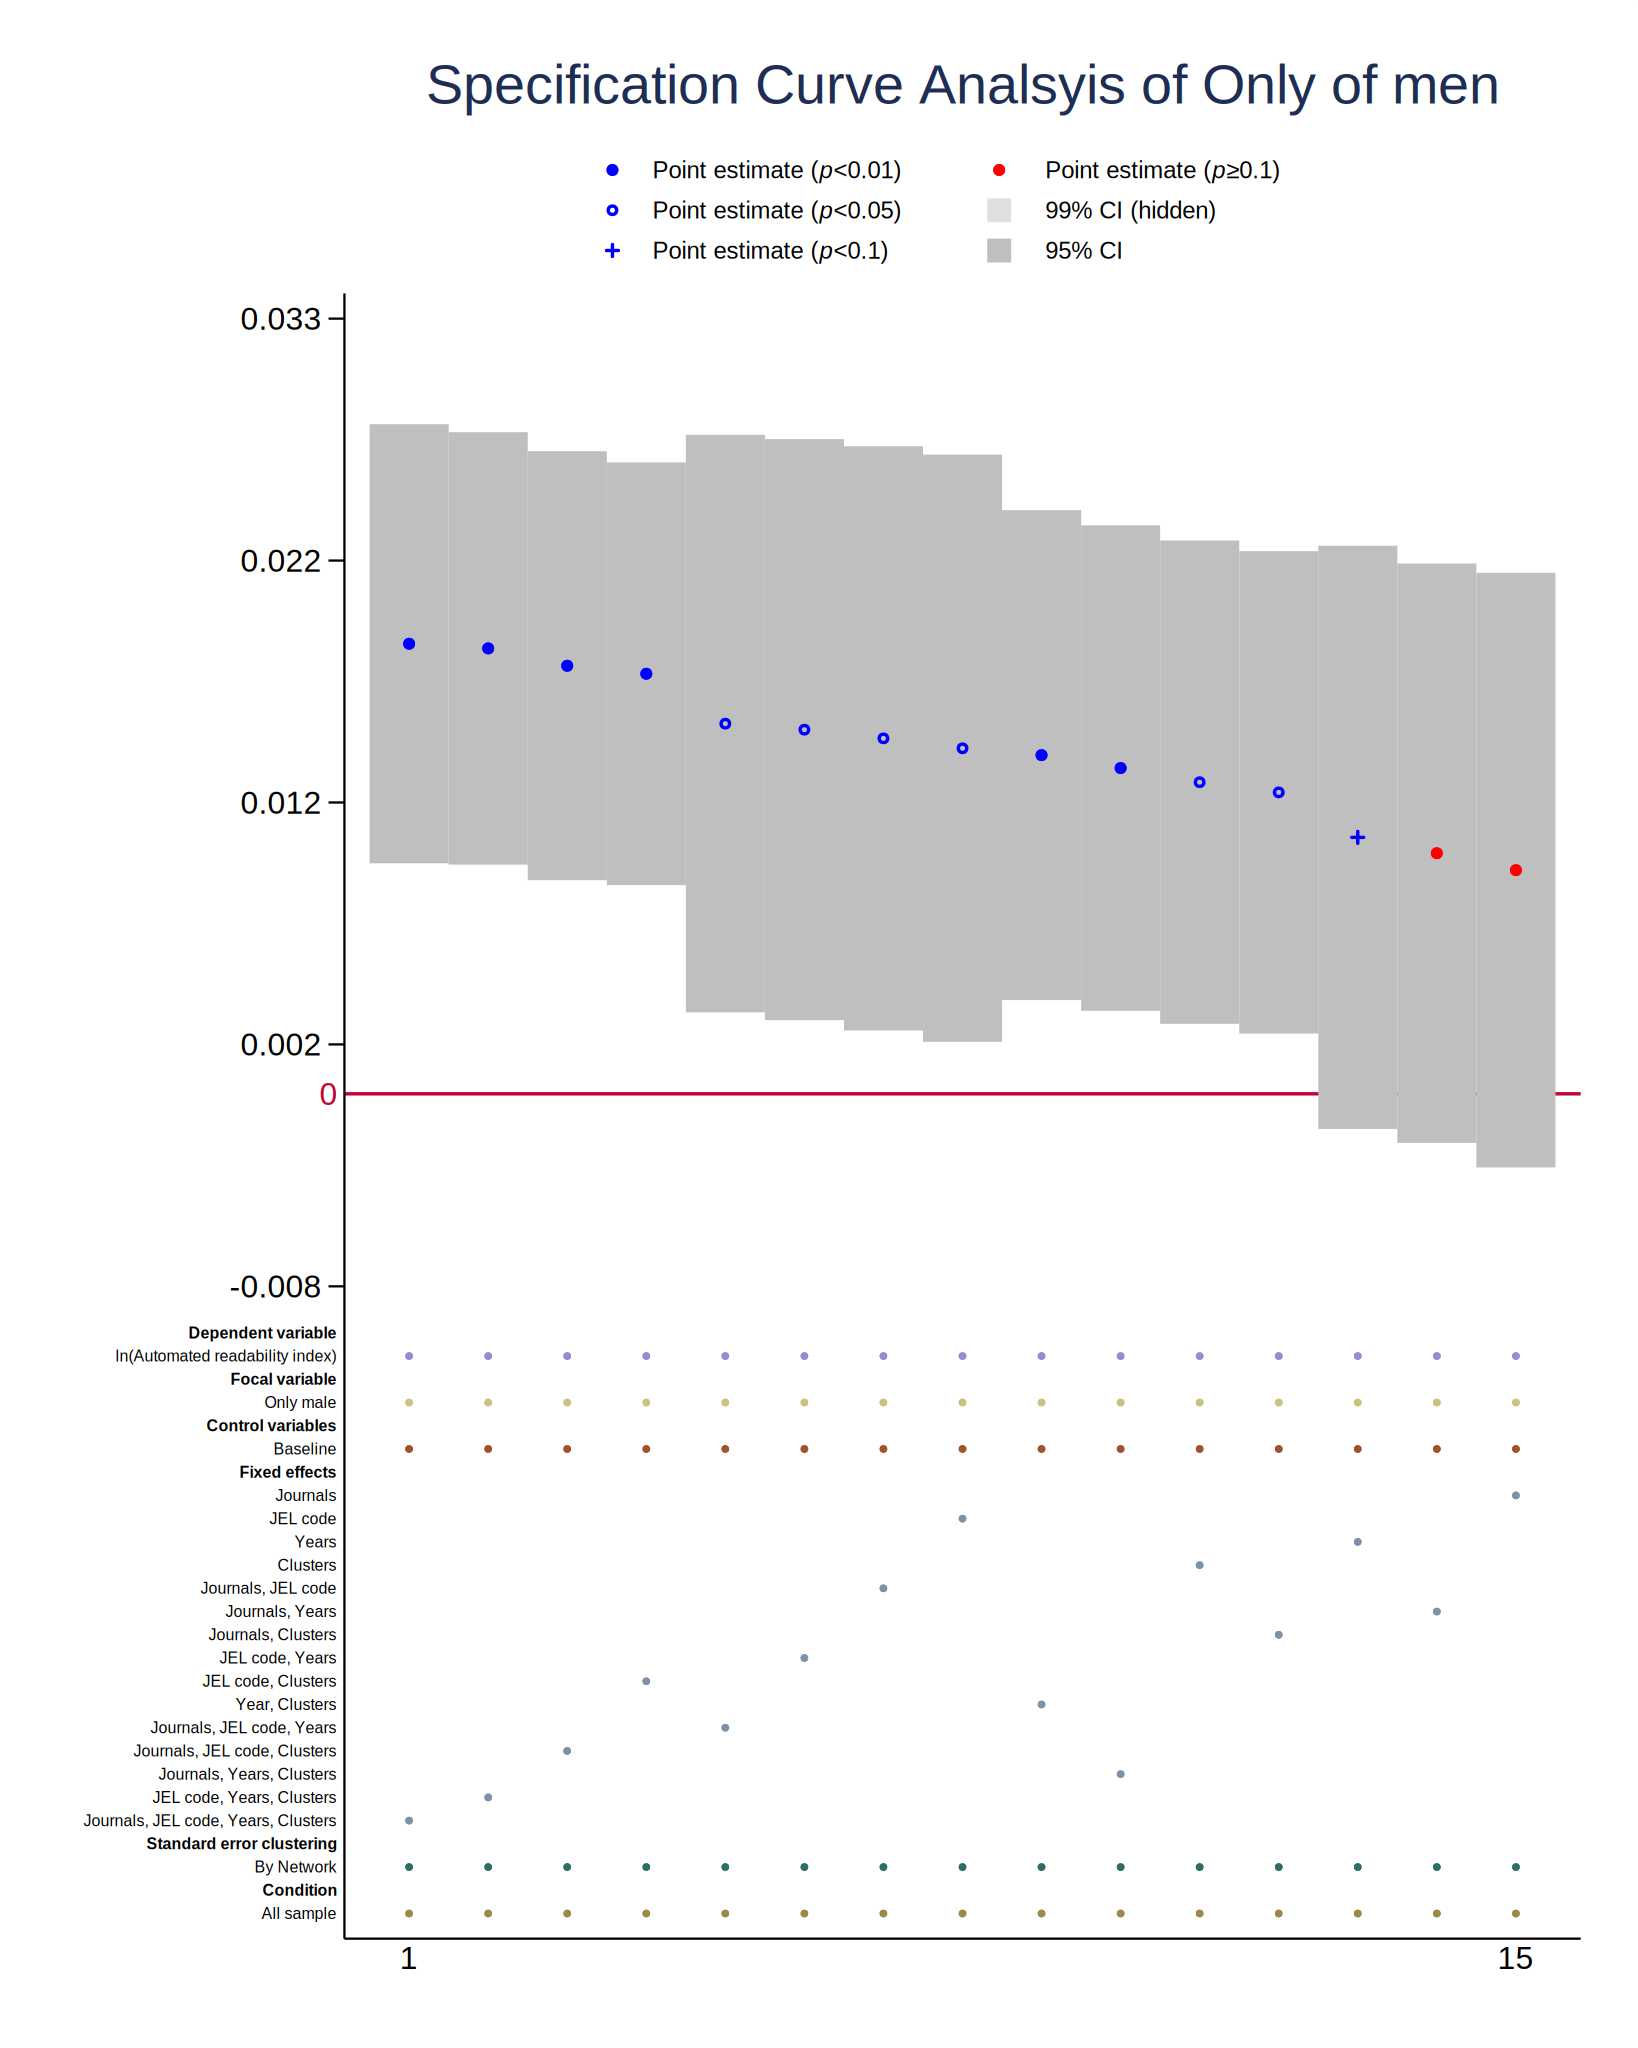

In [98]:
%%stata
#delimit ;
quietly specurve using "readability_graph_specurve.yml",
        desc noci99 width(8) height(10) relativesize(0.4)
        scale(0.7) title("Specification Curve Analsyis of Only of men");
#delimit crs

_Answer_: Yes, the result is robust to different model specifications.
Across the full set of specifications shown in the specification curve, the estimated coefficient on only_males remains positive and largely statistically significant, even when varying control variables, fixed effects (journals, JEL codes, years, clusters), and clustering schemes. Although the magnitude of the coefficient decreases slightly as models become more saturated, it does not change sign and rarely loses significance.

(e) [2%] Re-estimate the model in (c) using the _Double Selection_, _Partialing Out_, and the _Double Debiased Machine Learning_ (20 folds) estimators using the default plug-in value for the Lasso lambda and a random seed equal to 42. Do this quietly but save the results in objects `m1`, `m2`, and `m3` respectively.

In [154]:
%%stata -qui
* Double Selection
dsregress ARI i.only_males  $baseline , ///
    controls($mfe) vce(cluster cluster) rseed(42)
estimates store m1


* Partialing Out
poregress ARI i.only_males  $baseline , ///
    controls($mfe) vce(cluster cluster) rseed(42)
estimates store m2


* Double Debiased ML (20 folds)
xporegress ARI i.only_males  $baseline, ///
    controls($mfe) vce(cluster cluster) xfolds(20) rseed(42)
estimates store m3


(f) [2%] Read this post about the [`etable`](https://www.stata.com/stata17/tables-of-estimation-results/) Stata command as well as Jupyter's capabilities to display different [files and format outputs](https://jupyterlab.readthedocs.io/en/latest/user/file_formats.html), and then proceed to print _inline_ a `html` table containing all estimated coefficients and _p_-values for models `m0`, `m1`, `m2`, and `m3` as columns for for the regressors `log_num_authors`, `log_num_pages`, `both_genders` and `only_males`. Customize the look of the resulting table to include the "Number of Potential Controls" and the "Number of controls selected" in each model.  Are your results similar accross specifications or not? **Note**: No points will be awarded if you simply use the [`estimates table`](https://www.stata.com/manuals/restimatestable.pdf) Stata command discussed in the lectures.

In [194]:
# 1) Stata export (igual que el tuyo)
stata.run('''etable, estimates(m0 m1 m2 m3) ///
            keep(log_num_authors log_num_pages i.both_genders i.only_males)  ///
            cstat(_r_b, label("Coefficient") nformat(%9.4f)) ///
            cstat(_r_p, label("p-value") sformat("(%s)") nformat(%9.4f)) ///
            mstat(k_controls, nformat(%9.0f) label("Number of Potential Controls")) ///
            mstat(k_controls_sel, nformat(%9.0f) label("Number of controls selected") ) ///
            column(estimates) ///
            title("Regression coefficients to Automated Readability Index (ARI) per model with p-value on parenthesis") ///
            export(table_q1_f.html, replace)''', quietly=True)

# 2) Post-procesar HTML para marcar filas p-value y estilizar
from IPython.display import HTML, display

html_path = "table_q1_f.html"
with open(html_path, "r", encoding="utf-8") as f:
    raw_html = f.read()

css = """
<style>
  :root{
    --text:#111827; --muted:#6b7280; --line:#e5e7eb; --head:#f3f4f6;
    --zebra:#fafafa; --hover:#f8fafc; --card:#ffffff; --shadow:0 8px 20px rgba(0,0,0,.06);
    --pval:#6b7280;
  }
  @media (prefers-color-scheme: dark){
    :root{
      --text:#e5e7eb; --muted:#9ca3af; --line:#2d3748; --head:#111827;
      --zebra:#0b1220; --hover:#0f172a; --card:#0b1020; --shadow:0 12px 28px rgba(0,0,0,.35);
      --pval:#a1a1aa;
    }
  }

  .stata-table-wrap{
    font-family: ui-sans-serif, system-ui, -apple-system, Segoe UI, Roboto, Helvetica, Arial;
    color: var(--text);
    max-width: 1100px;
    margin: 18px auto;
  }
  .stata-table-card{
    background: var(--card);
    border: 1px solid var(--line);
    border-radius: 14px;
    box-shadow: var(--shadow);
    padding: 14px 14px 10px 14px;
  }
  .stata-table-caption{
    font-weight: 700;
    font-size: 15px;
    line-height: 1.35;
    margin: 4px 4px 12px 4px;
  }
  .stata-table-scroll{ overflow-x:auto; border-radius: 10px; }

  .stata-table-card table{ width:100%; border-collapse: separate; border-spacing:0; font-size:13px; }
  .stata-table-card th, .stata-table-card td{
    padding: 9px 10px;
    border-bottom: 1px solid var(--line);
    vertical-align: middle;
    white-space: nowrap;
  }
  .stata-table-card thead th{
    background: var(--head);
    font-weight: 700;
    text-align: center;
    border-top: 1px solid var(--line);
  }
  .stata-table-card thead tr:first-child th:first-child{ border-top-left-radius: 10px; }
  .stata-table-card thead tr:first-child th:last-child{ border-top-right-radius: 10px; }

  /* Zebra SOLO para filas "normales" (no p-values) */
  .stata-table-card tbody tr:not(.pval-row):nth-child(even) td{ background: var(--zebra); }
  .stata-table-card tbody tr:hover td{ background: var(--hover); }

  /* Alineación */
  .stata-table-card tbody td:first-child, .stata-table-card thead th:first-child{ text-align:left; }
  .stata-table-card tbody td:not(:first-child){ text-align:right; }

  /* Coef row (la fila anterior al p-value) */
  .coef-row td:not(:first-child){ font-weight: 650; }

  /* P-value row (fila separada) */
  .pval-row td{
    color: var(--pval);
    font-size: 12px;
    padding-top: 2px;
    padding-bottom: 8px;
    border-bottom: 1px solid var(--line);
  }
  .pval-row td:first-child{ color: transparent; } /* “oculta” label vacío */
  .pval-row td:not(:first-child){ font-variant-numeric: tabular-nums; }

  /* Secciones (si Stata exporta filas tipo heading) */
  .section-row td{
    font-weight: 700;
    text-align: left !important;
    background: var(--head) !important;
    border-top: 1px solid var(--line);
  }

  .stata-table-note{
    font-size: 12px;
    color: var(--muted);
    margin: 10px 4px 0 4px;
  }
</style>
"""

# --- Marcar filas p-value con BeautifulSoup (si está disponible) ---
processed_table_html = raw_html

try:
    from bs4 import BeautifulSoup

    soup = BeautifulSoup(raw_html, "html.parser")

    # Encontrar la primera tabla del HTML exportado
    table = soup.find("table")
    if table:
        tbody = table.find("tbody")
        if tbody:
            rows = tbody.find_all("tr", recursive=False)
            for i, tr in enumerate(rows):
                tds = tr.find_all(["td", "th"])
                row_text = " ".join(td.get_text(strip=True) for td in tds)

                # Heurística p-value:
                # - primera celda vacía Y hay paréntesis en celdas numéricas
                first_cell_text = tds[0].get_text(strip=True) if tds else ""
                looks_like_pval = (first_cell_text == "" and "(" in row_text and ")" in row_text)

                # Heurística sección:
                # - una sola celda o muchas celdas vacías excepto la primera
                nonempty_cells = [td.get_text(strip=True) for td in tds if td.get_text(strip=True) != ""]
                looks_like_section = (len(nonempty_cells) == 1 and len(tds) >= 1 and first_cell_text != "")

                if looks_like_section:
                    tr["class"] = (tr.get("class", []) + ["section-row"])
                elif looks_like_pval:
                    tr["class"] = (tr.get("class", []) + ["pval-row"])
                    # La fila anterior normalmente es el coeficiente
                    if i > 0:
                        prev = rows[i-1]
                        prev["class"] = (prev.get("class", []) + ["coef-row"])

        processed_table_html = str(soup)
except Exception:
    # Fallback: si no hay bs4, igual aplicamos CSS envolviendo raw_html
    processed_table_html = raw_html

# (Caption fija: puedes cambiarla)
caption = "Regression coefficients to ARI per model (p-values in parentheses)"

pretty_html = f"""
{css}
<div class="stata-table-wrap">
  <div class="stata-table-card">
    <div class="stata-table-caption">{caption}</div>
    <div class="stata-table-scroll">
      {processed_table_html}
    </div>
    <div class="stata-table-note">
      Notes: Coefficients reported with p-values in parentheses (displayed on separate rows).
    </div>
  </div>
</div>
"""

display(HTML(pretty_html))


,m0,m1,m2,m3
Logarithm of the number of authors,0.0022,0.0018,0.0031,0.0037
,(0.3795),(0.7322),(0.5761),(0.5978)
Logarithm of the number of pages,0.0230,0.0319,0.0295,0.0289
,(0.0000),(0.0000),(0.0000),(0.0021)
Indicator if author team includes both genders,,,,
1,0.0127,0.0060,0.0072,0.0074
,(0.0682),(0.4474),(0.4125),(0.5370)
Indicator if author team consists only of males,,,,
1,0.0190,0.0093,0.0104,0.0112
,(0.0001),(0.1487),(0.1660),(0.2576)


_Answer_: In all specifications (m0–m3), the effect of the logarithm of the number of pages is positive and statistically significant, indicating that longer articles are associated with a higher ARI and, therefore, lower readability. This result is highly stable and independent of the estimation method used. The coefficient for only_males is positive in all models, suggesting that abstracts written by all-male teams tend to be less readable. Overall, while the direction of the main coefficients is consistent across all specifications, only the article length effect is robust in terms of statistical significance, whereas the effect of all-male teams is not robust to high-dimensional estimation methods, as expected based on the methodology.

#### Question 2

We now turn our attention to a logistic analysis of the relationship between the readability of articles' abstracts in our sample and the `only_males` **dummy variable**. _All_ your analysis should cluster standard errors at the `cluster` variable level as we did in the lectures. Similarly, the base category remains articles published in the AER, in the field of 'Microeconomics', in 2000, that belongs to the first cluster.

(a) [1%] Create a new variable called `ARI_01` that equals one if `automated_readability_index` is greater or equal to its 95\% empirical percentile in the sample. Do this quietly.

In [203]:
%%stata -qui
summarize automated_readability_index, detail
local cutoff = r(p95)

gen int ARI_01 = (automated_readability_index >= `cutoff')

(b) [2%] Using the variable of **dummy variable** of interest `only_males` and variable lists `baseline` and `mfe` you created in question 8(b) above, proceed to run a logistic regression of `ARI_01` on `only_males`, `baseline`, and `mfe` clustering standard errors at the `cluster` level. Do this quietly creating a `html` output table using the [`etable`](https://www.stata.com/stata17/tables-of-estimation-results/) Stata command of all estimated coefficients for `log_num_authors`, `log_num_pages`, `both_genders`, and `only_males` with 3 decimals and stars representing their significance at the 10\%, 5\%, and 1\% as discussed in the lectures. Customize the look of the resulting table to include the "Number of Observations"as well as the "Pseudo R-squared". Print the resulting `html` file inline in this notebook. **Note**: No points will be awarded if you simply use the [`estimates table`](https://www.stata.com/manuals/restimatestable.pdf) Stata command discussed in the lectures.

In [208]:
# 1) Export desde Stata (tu comando)
stata.run('''logit ARI_01 i.only_males $baseline $mfe, vce(cluster cluster) nolog
            etable, keep(log_num_authors log_num_pages i.both_genders only_male) ///
            stars(0.10 "*" 0.05 "**" 0.01 "***") ///
            cstat(_r_b ,nformat(%6.3f)) ///
            mstat(N) mstat(r2_p) ///
            export(table_q2.html, replace)''', quietly=True)

# 2) Leer HTML y aplicar formato profesional
from IPython.display import HTML, display

html_path = "table_q2.html"
with open(html_path, "r", encoding="utf-8") as f:
    raw_html = f.read()

css = """
<style>
  :root{
    --text:#111827; --muted:#6b7280; --line:#e5e7eb; --head:#f3f4f6;
    --zebra:#fafafa; --hover:#f8fafc; --card:#ffffff; --shadow:0 8px 20px rgba(0,0,0,.06);
  }
  @media (prefers-color-scheme: dark){
    :root{
      --text:#e5e7eb; --muted:#9ca3af; --line:#2d3748; --head:#111827;
      --zebra:#0b1220; --hover:#0f172a; --card:#0b1020; --shadow:0 12px 28px rgba(0,0,0,.35);
    }
  }

  .stata-table-wrap{
    font-family: ui-sans-serif, system-ui, -apple-system, Segoe UI, Roboto, Helvetica, Arial;
    color: var(--text);
    max-width: 950px;
    margin: 18px auto;
  }
  .stata-table-card{
    background: var(--card);
    border: 1px solid var(--line);
    border-radius: 14px;
    box-shadow: var(--shadow);
    padding: 14px 14px 10px 14px;
  }
  .stata-table-caption{
    font-weight: 700;
    font-size: 15px;
    line-height: 1.35;
    margin: 4px 4px 12px 4px;
  }
  .stata-table-scroll{ overflow-x:auto; border-radius: 10px; }

  /* Tabla exportada por Stata */
  .stata-table-card table{ width:100%; border-collapse: separate; border-spacing:0; font-size:13px; }
  .stata-table-card th, .stata-table-card td{
    padding: 9px 10px;
    border-bottom: 1px solid var(--line);
    vertical-align: middle;
    white-space: nowrap;
  }
  .stata-table-card thead th{
    background: var(--head);
    font-weight: 700;
    text-align: center;
    border-top: 1px solid var(--line);
  }
  .stata-table-card thead tr:first-child th:first-child{ border-top-left-radius: 10px; }
  .stata-table-card thead tr:first-child th:last-child{ border-top-right-radius: 10px; }

  /* Zebra y hover */
  .stata-table-card tbody tr:nth-child(even) td{ background: var(--zebra); }
  .stata-table-card tbody tr:hover td{ background: var(--hover); }

  /* Alineación */
  .stata-table-card tbody td:first-child,
  .stata-table-card thead th:first-child{ text-align:left; }
  .stata-table-card tbody td:not(:first-child){ text-align:right; }

  /* Estrellas de significancia: más “académico” */
  .stata-table-card td{
    font-variant-numeric: tabular-nums;
  }
  .stata-table-card td .stars,
  .stata-table-card td sup{
    font-size: 10px;
    vertical-align: super;
    margin-left: 2px;
    letter-spacing: .2px;
  }

  /* Filas sección */
  .section-row td{
    font-weight: 700;
    text-align: left !important;
    background: var(--head) !important;
    border-top: 1px solid var(--line);
  }

  /* Nota al pie (si Stata la exporta como texto fuera de tabla) */
  .stata-table-note{
    font-size: 12px;
    color: var(--muted);
    margin: 10px 4px 0 4px;
    line-height: 1.35;
  }
</style>
"""

# --- Opcional: detectar filas tipo “sección” y darles clase ---
processed_html = raw_html
try:
    from bs4 import BeautifulSoup
    soup = BeautifulSoup(raw_html, "html.parser")

    table = soup.find("table")
    if table:
        tbody = table.find("tbody")
        if tbody:
            rows = tbody.find_all("tr", recursive=False)
            for tr in rows:
                tds = tr.find_all(["td","th"])
                if not tds:
                    continue
                texts = [td.get_text(strip=True) for td in tds]
                nonempty = [t for t in texts if t != ""]

                # Heurística sección: solo 1 texto no vacío y es la primera celda,
                # o muchas celdas vacías a la derecha.
                looks_like_section = (len(nonempty) == 1 and texts[0] != "")

                if looks_like_section:
                    tr["class"] = (tr.get("class", []) + ["section-row"])

    processed_html = str(soup)
except Exception:
    processed_html = raw_html

caption = "Regression results for ARI (stars denote significance)"

pretty_html = f"""
{css}
<div class="stata-table-wrap">
  <div class="stata-table-card">
    <div class="stata-table-caption">{caption}</div>
    <div class="stata-table-scroll">
      {processed_html}
    </div>
    <div class="stata-table-note">
      Note: *** p&lt;0.01, ** p&lt;0.05, * p&lt;0.10.
    </div>
  </div>
</div>
"""

display(HTML(pretty_html))


(c) [2%] Verify _numerically_ that the proportion of ones in the sample equals the _average_ in-sample fitted probabilities after fitting a _logistic regression_. **Note**: Your code should be succint and elegant while paying attention to the effective estimation sample, i.e. [`e(sample)`](https://www.stata.com/manuals17/rlogit.pdf).

In [129]:
%%stata
predict double phat if e(sample), pr
summarize ARI_01 phat if e(sample)



. predict double phat if e(sample), pr
(547 missing values generated)

. summarize ARI_01 phat if e(sample)

    Variable |        Obs        Mean    Std. dev.       Min        Max
-------------+---------------------------------------------------------
      ARI_01 |      4,441    .0551678    .2283331          0          1
        phat |      4,441    .0551678    .0585616   .0048497   .8248234

. 


(d) [3%] For a binary response $Y$, let $\bar{Y}$ be the proportion of ones in the sample (which is equal to the sample average of the $Y_i$. Let $\hat{q}_0$ be the percent correctly predicted for the outcome $Y=0$ and let $\hat{q}_1$ be the percent correctly predicted for the outcome $Y=1$. If $\hat{p}$ is the overall percent correctly predicted, one can show that 
$$
\hat{p}=(1-\bar{y}) \hat{q}_0+\bar{y} \hat{q}_1.
$$
Using the scalars stored in the `r()` output after issuing the [`estat class`](https://www.stata.com/manuals/restatclassification.pdf) Stata command, proceed to verify this _numerically_ solely using the [`get_return()`](https://www.stata.com/python/pystata18/stata.html#pystata.stata.get_return) function of the [`Pystata`](https://www.stata.com/python/pystata18/stata.html) Python module. **Note**: No points will be awarded for utilizing any other alternative method to achieve the exact same result.

In [209]:
stata.run('''estat class''',quietly=True)
from pystata import stata
#importando valores desde estar hacia objetos en python
p0    = stata.get_return()["r(P_n0)"]
p1    = stata.get_return()["r(P_p1)"]
stata.run('''summarize ARI_01 if e(sample)''',quietly=True)
ybar  = stata.get_return()["r(mean)"]
p_rhs = (1 - ybar) * p0 + ybar * p1
print(p_rhs)


94.5282594010358


(e) [2%] Calculate the _Average_ Marginal Effect of the **dummy variable** of interest `only_males` on the probability that the `automated_readability_index` is greater or equal to its 95\% empirical percentile in the sample. Provide an meaningful interpretation of this number.

In [210]:
%%stata 
margins only_males


Predictive margins                                       Number of obs = 4,441
Model VCE: Robust

Expression: Pr(ARI_01), predict()

------------------------------------------------------------------------------
             |            Delta-method
             |     Margin   std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
  only_males |
          0  |   .0363608   .0049857     7.29   0.000      .026589    .0461326
          1  |   .0652079   .0049327    13.22   0.000     .0555399    .0748759
------------------------------------------------------------------------------


_Answer_: Being written by an all-male author team increases the probability that an abstract falls in the top 5% most unreadable texts (by ARI) by about 2.9 percentage points (6.5 - 3.6), holding other covariates constant. This effect is statistically significant (p < 0.001), indicating a meaningful increase in the likelihood of very low readability for all-male teams.

(f) [3%] Calculate the Marginal Effect of the **dummy variable** of interest `only_males` when `both_genders`=0, `log_num_authors`=0.60205999132, and `log_num_pages` take on values 1, 1.5, 2, 2.5, 3, 3.5, 4, and 4.5. Do this quietly, but then provide a 2D plot of these effects against these 8 values for `log_num_pages` along with their 95\% confidence interval. **Note**: No points will be awarded if you decide to use anything else except Stata built-in functions for this task.

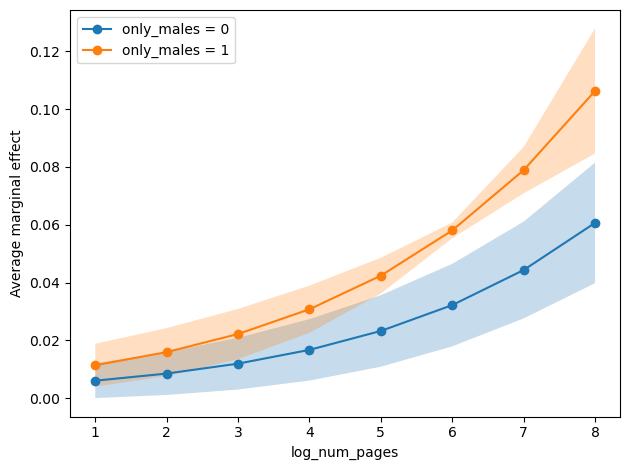

In [213]:
stata.run('''cd "../data/"
            margins only_males, at(both_genders=0 log_num_authors=0.60205999132 log_num_pages=(1(.5)4.5)) ///
            saving(data_homework, replace) 
            use data_homework, clear
            rename _margin delta_hat
            rename _at log_num_pages
            rename _m1 only_males
            save data_homework_1, replace
            ''', quietly=True)
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el archivo generado por Stata
df = pd.read_stata("data_homework_1.dta")

# Asegurar orden en el eje x
df = df.sort_values("log_num_pages")

# Crear el gráfico
plt.figure()

for g, dfg in df.groupby("only_males"):
    plt.plot(
        dfg["log_num_pages"],
        dfg["delta_hat"],
        marker="o",
        label=f"only_males = {int(g)}"
    )
    plt.fill_between(
        dfg["log_num_pages"],
        dfg["_ci_lb"],
        dfg["_ci_ub"],
        alpha=0.25
    )

plt.xlabel("log_num_pages")
plt.ylabel("Average marginal effect")


plt.legend()
plt.tight_layout()
plt.show()


#### Question 3

In this question, we revisit the _Poisson_ analysis of the number of sentences in excess of 3 but with respect to our new **dummy variable** of interest, `only_males`. However, we are going to change our base category to articles published in the QJE, in the field of "Mathematical and Quantitative Methods: General" (JEL C), published in the year 2010, _but_ still belonging to the first cluster, for which JEL codes have been imputed

(a) [3%] Re-create the outcome variable `excess_sentences` as done in the lectures. After reading the relevant [variable description](https://github.com/lfsanche/econ_letters/blob/main/data/vars_description.md) information again, _recreate_ the `baseline` and `mfe` variable lists (that you already know how to create using the [`vl`](https://www.stata.com/manuals/dvl.pdf) Stata commands) taking into account that `only_males` is now replacing `prop_women` and it is a **dummy variable**. Your code should reflect the fact that the base category has changed.

In [229]:
%%stata -qui
use "../data/data", clear

quietly tabulate year, generate(y_)
quietly tabulate cluster, generate(c_)

local journals ecm jpe qje res  //AER based category

local jel_imp a_imp b_imp d_imp e_imp f_imp g_imp h_imp i_imp j_imp k_imp /// 
		l_imp m_imp n_imp o_imp p_imp q_imp r_imp y_imp z_imp // C JEL based case

#delimit ;
vl set log_num_authors log_num_pages both_genders only_males
       `journals' `jel_imp' y_1-y_9 y_11-y_20 c_2-c_215 jel_flag
       , dummy clear nonotes;

vl create fe = vldummy - (both_genders jel_flag only_males);
vl substitute mfe = i.fe;
vl create controls = vlcontinuous;
vl create controls_dummy = (both_genders jel_flag);
vl substitute baseline = i.controls_dummy controls;
vl rebuild;
#delimit cr

summarize num_sentences, detail
local cutoff_sentences = r(p5)
gen int excess_sentences = num_sentences - `cutoff_sentences'
replace excess_sentences = 0 if excess_sentences < 0

(b) [3%] Using the `ppmlhdfe` user-written Stata command quietly proceed to estimate a high-dimensional fixed effect Poisson regression of `excess_sentences` on the **dummy variable** of interest, `only_males`, and the `baseline` regressors controlling for the `mfe` fixed effects. Do this quietly creating a `html` output table using the [`etable`](https://www.stata.com/stata17/tables-of-estimation-results/) Stata command of all the estimated coefficients for `log_num_authors`, `log_num_pages`, `both_genders`, and `only_males` with 4 decimals and stars representing their significance at the 10\%, 5\%, and 1\%. Print the resulting `html` file inline in this notebook. **Note**: No points will be awarded if you simply use the [`estimates table`](https://www.stata.com/manuals/restimatestable.pdf) Stata command discussed in the lectures.

In [230]:
%%stata -qui
#delimit ;
ppmlhdfe excess_sentences i.only_males $baseline,
                          absorb($mfe)  vce(cluster cluster) d;
etable, keep(log_num_authors log_num_pages i.both_genders i.only_males) /// 
stars(0.1 "*" 0.05 "**" 0.01 "***") export("etable_ppmlhdfe.html", replace);
#delimit cr

(c) [2%] What is the estimated percentage by which the number of sentences in excess of 3 for an article exclusively written by men exceeds the number of sentences in excess of 3 for an article no exclusively written by men ceteris paribus?

In [241]:
%%stata
display %6.2f ((exp(_b[1.only_males])-1)*100) " percent."

 -4.68 percent.


_Answer_: The estimated effect of −4.68% implies that, ceteris paribus, articles written exclusively by men have on average 4.68% fewer sentences in excess of the cutoff (3 sentences) compared to articles not written exclusively by men. In other words, holding constant the baseline controls and high-dimensional fixed effects, all-male author teams are associated with a slightly lower number of excess sentences, and thus marginally more concise abstracts relative to the reference group.

(d) [2%] What is the _Average_ Marginal Effect of the **dummy_variable** of interest, `only_males`, ceteris paribus? Please provide an interpretation.

In [239]:
%%stata
margins only_males


Predictive margins                                       Number of obs = 4,978
Model VCE: Robust

Expression: Predicted mean of excess_sentences, predict()

------------------------------------------------------------------------------
             |            Delta-method
             |     Margin   std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
  only_males |
          0  |   2.614396   .0304621    85.82   0.000     2.554691      2.6741
          1  |    2.49193   .0103032   241.86   0.000     2.471736    2.512123
------------------------------------------------------------------------------


_Answer_: Ceteris paribus, articles written exclusively by men have, on average, about 0.12 fewer excess sentences than articles not written exclusively by men. This difference is statistically significant (p < 0.001), indicating a small but meaningful reduction in excess sentence count associated with all-male author teams.

(e) [5%] Create a 3D graph of $\widehat{\delta}_{\text{only males}}$ as a function of `log(number of pages)` and `log(number of authors)` for an article published in the QJE, year 2010, with JEL C, that belongs to cluster 1, JEL codes that have **not** been imputed, written by _single_-gender authors. The `log(number of pages)` should take on values 1, 1.5, 2,..., 3.5, 4, and `log(number of authors)` should take on values 0, 0.25,..., 1.75, 2.

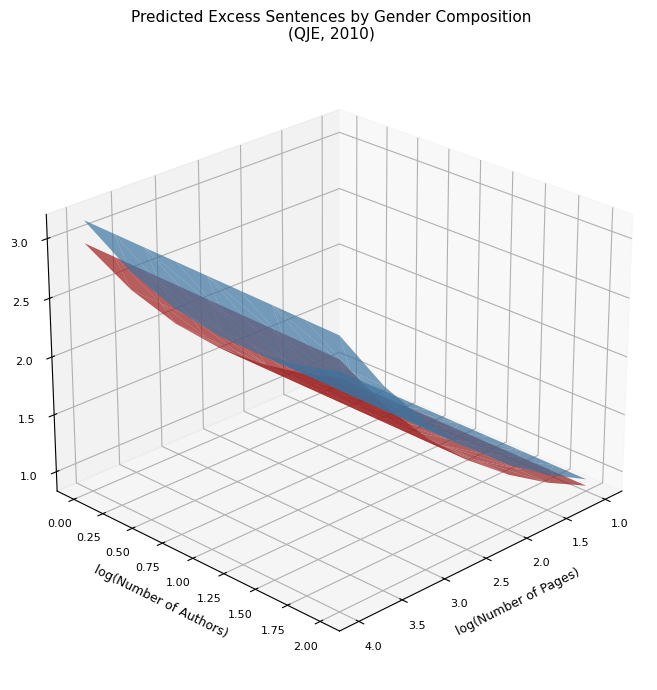

In [227]:
stata.run('''egen jel_any_imp = rowtotal(`jel_imp')
            gen jel_imp_ = (jel_any_imp>0)

            ppmlhdfe excess_sentences i.only_males $baseline if jel_imp_==1, absorb($mfe)  ///
            vce(cluster cluster) d
            margins only_males, at(log_num_pages=(1(0.5)4) log_num_authors=(0(0.25)2) (base)) ///
            saving(base_para_grafico, replace)

            use base_para_grafico, replace
            rename _at4 log_num_pages
            rename _at5 log_num_authors
            rename _m1 only_males
            save base_para_grafico_1, replace
            ''', quietly=True)

from mpl_toolkits.mplot3d import Axes3D

# Cargar base ya renombrada
df = pd.read_stata("base_para_grafico_1.dta")

# Separar por dummy
df_males = df[df["only_males"] == 1]
df_not_males = df[df["only_males"] == 0]

# Crear figura
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection="3d")

# Plano: only_males = 1
ax.plot_trisurf(
    df_males["log_num_pages"],
    df_males["log_num_authors"],
    df_males["_margin"],
    color="firebrick",
    alpha=0.7,
    edgecolor="none"
)

# Plano: only_males = 0
ax.plot_trisurf(
    df_not_males["log_num_pages"],
    df_not_males["log_num_authors"],
    df_not_males["_margin"],
    color="steelblue",
    alpha=0.7,
    edgecolor="none"
)

# Etiquetas con letra reducida
ax.set_xlabel("log(Number of Pages)", fontsize=9)
ax.set_ylabel("log(Number of Authors)", fontsize=9)
ax.set_zlabel("Predicted Excess Sentences", fontsize=9)

# Tamaño de los valores de los ejes
ax.tick_params(axis='both', which='major', labelsize=8)
ax.tick_params(axis='z', labelsize=8)

# Rotación:
# elev = inclinación vertical
# azim = rotación horizontal (45° respecto al eje log(pages))
ax.view_init(elev=25, azim=45)

# Título
ax.set_title(
    "Predicted Excess Sentences by Gender Composition\n(QJE, 2010)",
    fontsize=11
)

plt.tight_layout()
plt.show()

# Guardar figura (opcional)
fig.savefig("../figures/grafico_3d_final.png", dpi=300, bbox_inches="tight")
